## Observations and Insights 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.sort_values('Tumor Volume (mm3)', ascending=False)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1778,o331,45,78.567014,4
1861,l725,45,76.668817,3
1774,p189,45,75.294936,4
1830,m269,45,75.123690,1
1853,t724,45,75.113288,2
...,...,...,...,...
1605,k403,35,26.546993,1
1652,s185,40,25.472143,1
1628,k403,40,24.365505,1
1849,s185,45,23.343598,1


In [4]:
# Combine the data into a single dataset
merged_dfs=pd.merge(mouse_metadata, study_results, on='Mouse ID' )

# Display the data table for preview
merged_dfs


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_num= merged_dfs['Mouse ID'].nunique()
mice_num

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results[study_results.duplicated()]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.0,0


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_dfs[merged_dfs.duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cdf = merged_dfs.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)


In [9]:
# Checking the number of mice in the clean DataFrame.
mic_num_cd=cdf['Mouse ID'].nunique()
mic_num_cd

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean= merged_clean.groupby(('Drug Regimen'))['Tumor Volume (mm3)'].mean()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tv_mean= cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tv_median=cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tv_variance=cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tv_std=cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tv_sem=cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [11]:
# Assemble the resulting series into a single summary dataframe.
sum_df = pd.DataFrame({ 
    'Mean' : tv_mean,
    'Median' : tv_median,
    'Variance': tv_variance,
    'STD':tv_std,
    'SEM': tv_sem                         
})

sum_df.head()

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

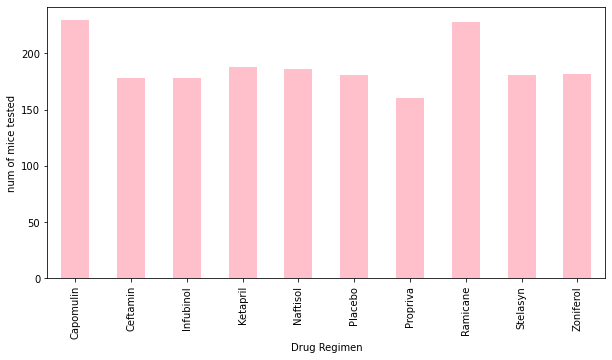

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

fig_bar=cdf.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar', figsize = (10,5), color='pink')
fig_bar.set_ylabel('num of mice tested')
plt.show()


<AxesSubplot:xlabel='Drug Regimen'>

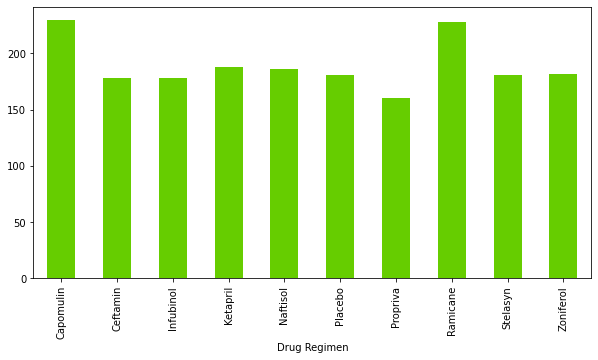

In [14]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen= cdf.groupby('Drug Regimen')['Timepoint'].count()
drug_regimen.plot.bar(figsize = (10,5), color='#66CD00')


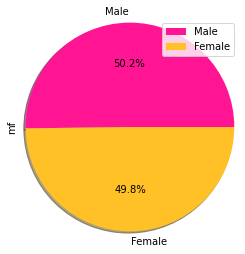

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_male_mice=cdf.loc[cdf['Sex']=='Male',:].nunique().iloc[0]
total_female_mice=cdf.loc[cdf['Sex']=='Female',:].nunique().iloc[0]

#Data Frame by M/F
mf_cdf=pd.DataFrame({'mf': [total_male_mice, total_female_mice]}, index=['Male','Female'] )
colors = ['#FF1493','#FFC125']
fig_pie=mf_cdf.plot(kind='pie',  y='mf',shadow=True, autopct='%1.1f%%', colors=colors, radius=1.2)
plt.show()


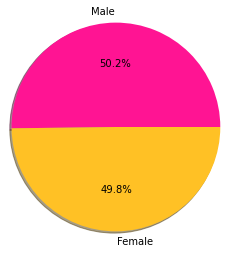

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['#FF1493','#FFC125']
mf_count=mf_cdf['mf']
plt.pie(mf_count,radius=1.2, colors=colors, shadow=True, autopct='%1.1f%%', labels=['Male', 'Female'])
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#final tumor vol per mouse

tv_df=cdf[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

cap_filtered= filter_rows_by_values(tv_df, "Drug Regimen", ["Capomulin"])
ram_filtered= filter_rows_by_values(tv_df, "Drug Regimen", ["Ramicane"])
inf_filtered= filter_rows_by_values(tv_df, "Drug Regimen", ["Infubinol"])
cef_filtered= filter_rows_by_values(tv_df, "Drug Regimen", ["Ceftamin"])

# Start by getting the last (greatest) timepoint for each mouse
cap_sort_df=cap_filtered.sort_values(['Timepoint'], ascending=False)
ram_sort_df=ram_filtered.sort_values(['Timepoint'], ascending=False)
inf_sort_df=inf_filtered.sort_values(['Timepoint'], ascending=False)
cef_sort_df=cef_filtered.sort_values(['Timepoint'], ascending=False)

cap_df=cap_sort_df.drop_duplicates(subset='Mouse ID')
ram_df=ram_sort_df.drop_duplicates(subset='Mouse ID')
inf_df=inf_sort_df.drop_duplicates(subset='Mouse ID')
cef_df=cef_sort_df.drop_duplicates(subset='Mouse ID')


In [18]:
# Start by getting the last (greatest) timepoint for each mouse
gby_df=study_results.groupby('Mouse ID')
max_tp=gby_df['Timepoint'].max().reset_index()
max_tp

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df=max_tp.merge(cdf, on="Mouse ID")
merged_df

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1887,z969,45,Naftisol,Male,9,30,25,63.145652,2
1888,z969,45,Naftisol,Male,9,30,30,65.841013,3
1889,z969,45,Naftisol,Male,9,30,35,69.176246,4
1890,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
tr_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
temp_list=np.arange(0,80,10)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
drug_sorted = merged_df[(merged_df['Drug Regimen']== "Ceftamin")
                      |(merged_df['Drug Regimen']=="Ramicane")
                      |(merged_df['Drug Regimen']=="Infubinol")
                      |(merged_df['Drug Regimen']=="Capomulin")]

tumor_max = drug_sorted.loc[(drug_sorted["Timepoint_y"])==(drug_sorted["Timepoint_x"])]
tumor_max
    
    # add subset 
Ceftamin = tumor_max[tumor_max['Drug Regimen']== "Ceftamin"]['Tumor Volume (mm3)']
Ramicane = tumor_max[tumor_max['Drug Regimen']== "Ramicane"]['Tumor Volume (mm3)']
Infubinol = tumor_max[tumor_max['Drug Regimen']== "Infubinol"]['Tumor Volume (mm3)']
Capomulin = tumor_max[tumor_max['Drug Regimen']== "Capomulin"]['Tumor Volume (mm3)']  

drug_list=[Ceftamin, Ramicane, Infubinol, Capomulin]
    
    # Determine outliers using upper and lower bounds
q1=tumor_max['Tumor Volume (mm3)'].quantile(0.25)
q3=tumor_max['Tumor Volume (mm3)'].quantile(0.75)
iqr=q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

print("lower bound:" , lower_bound)
print('upper_bound', upper_bound)

lower bound: 3.0739668737500097
upper_bound 94.04403868374999


Text(0.5, 1.0, 'Capomulin')

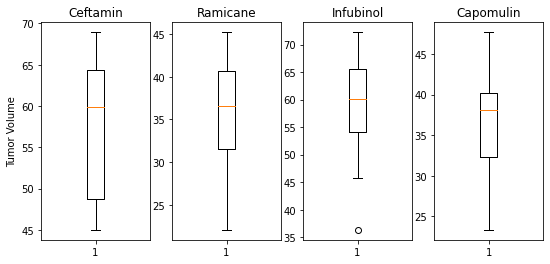

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(9, 4))
bplot1 = ax1.boxplot(Ceftamin)  
ax1.set_title('Ceftamin')
ax1.set_ylabel('Tumor Volume')
bplot2 = ax2.boxplot(Ramicane)  
ax2.set_title('Ramicane')

bplot3 = ax3.boxplot(Infubinol)  
ax3.set_title('Infubinol')

bplot4 = ax4.boxplot(Capomulin )  
ax4.set_title('Capomulin')


## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

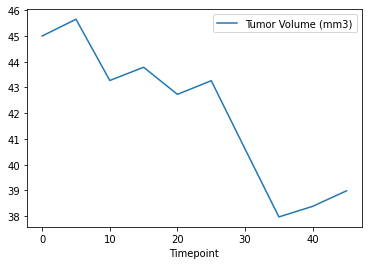

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cdf[(cdf['Drug Regimen']== "Capomulin")]
mouseid_capomulin = capomulin_df[capomulin_df['Mouse ID']=='b128'][['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint')
mouseid_capomulin.plot()


In [23]:
#cdf

<AxesSubplot:title={'center':' Mouse Weight Vs. Average Tumor Volume'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

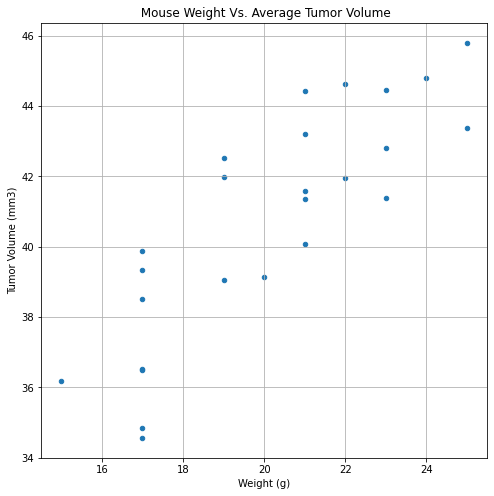

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ave=capomulin_df.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
capomulin_df["Tumor Volume (mm3)"]
ave.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title=" Mouse Weight Vs. Average Tumor Volume")


In [25]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
av_tu = ave["Tumor Volume (mm3)"]
weight = ave["Weight (g)"]
correlation = st.pearsonr(av_tu,weight)

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84
